
#### **Rossmann Store Sales Prediction**
##### This project aims to predict daily sales for Rossmann stores using historical sales data, store characteristics, promotions, and other relevant factors. The project will involve data cleaning, exploratory data analysis (EDA), feature engineering, model building, and prediction.

### **1.Project Definition and Objectives**
**Objective** 
- To predict daily sales for Rossmann stores based on historical data and various features such as store type, promotions, and competition.

**Goals**
- Understand the key factors that influence sales in retail stores.
- Build a predictive model that can accurately forecast sales for Rossmann stores.
- Identify actionable insights for improving sales based on model predictions.

**DataSets**
- train.csv: Historical sales data.
- store.csv: Store-related features.
- test.csv: Data for making predictions.
- sample_submission.csv: Example submission format.

### **Creating enviroment**

-------------------------------------------------------------------------------------------------------------------

### **2.Data Cleaning and preproccessing**

**Loading Data** 
- Import all datasets into pandas DataFrames.



In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')
store_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/store.csv')
test_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/test.csv')
sample_submission_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/sample_submission.csv')


/var/folders/dc/ldz3k5913l3gjmcgcw60g3x80000gp/T/ipykernel_34824/1813341619.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/mustafaaldabbas/Documents/GitHub/Rossmann-sales-prediction/Datasets/Raw/train.csv')


In [2]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
sample_submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


**Missing Values**
- Identify and impute missing values or remove columns/rows with excessive missing data.



In [5]:
# Check for missing values in each dataset
missing_train = train_df.isnull().sum()
missing_store = store_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Filter to only show columns with missing values
missing_train = missing_train[missing_train > 0]
missing_store = missing_store[missing_store > 0]
missing_test = missing_test[missing_test > 0]

print("Missing values in train_df:")
print(missing_train)

print("\nMissing values in store_df:")
print(missing_store)

print("\nMissing values in test_df:")
print(missing_test)


Missing values in train_df:
Series([], dtype: int64)

Missing values in store_df:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Missing values in test_df:
Open    11
dtype: int64


In [6]:
# Handle missing values in store_df
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store_df['Promo2SinceWeek'].fillna(0, inplace=True)
store_df['Promo2SinceYear'].fillna(0, inplace=True)
store_df['PromoInterval'].fillna('None', inplace=True)

# Handle missing values in test_df
test_df['Open'].fillna(test_df['Open'].mode()[0], inplace=True)

# Verify that there are no remaining missing values
missing_store_after = store_df.isnull().sum()
missing_test_after = test_df.isnull().sum()

print("Remaining missing values in store_df:")
print(missing_store_after[missing_store_after > 0])

print("\nRemaining missing values in test_df:")
print(missing_test_after[missing_test_after > 0])


Remaining missing values in store_df:
Series([], dtype: int64)

Remaining missing values in test_df:
Series([], dtype: int64)


**Data Type**
- Convert date columns to datetime and categorical variables to appropriate types.
- ensure categorical Variables are Properly Formatted. 



In [7]:
# Convert Date columns to datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

# Ensure categorical variables are properly formatted
train_df['StateHoliday'] = train_df['StateHoliday'].astype('category')
train_df['Store'] = train_df['Store'].astype('category')
train_df['DayOfWeek'] = train_df['DayOfWeek'].astype('category')
train_df['Promo'] = train_df['Promo'].astype('category')
train_df['SchoolHoliday'] = train_df['SchoolHoliday'].astype('category')

store_df['Store'] = store_df['Store'].astype('category')
store_df['StoreType'] = store_df['StoreType'].astype('category')
store_df['Assortment'] = store_df['Assortment'].astype('category')
store_df['PromoInterval'] = store_df['PromoInterval'].astype('category')

test_df['StateHoliday'] = test_df['StateHoliday'].astype('category')
test_df['Store'] = test_df['Store'].astype('category')
test_df['DayOfWeek'] = test_df['DayOfWeek'].astype('category')
test_df['Promo'] = test_df['Promo'].astype('category')
test_df['SchoolHoliday'] = test_df['SchoolHoliday'].astype('category')

# Display the dtypes to confirm the changes
print("Data types in train_df after conversion:")
print(train_df.dtypes)

print("\nData types in store_df after conversion:")
print(store_df.dtypes)

print("\nData types in test_df after conversion:")
print(test_df.dtypes)


Data types in train_df after conversion:
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                  category
StateHoliday           category
SchoolHoliday          category
dtype: object

Data types in store_df after conversion:
Store                        category
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

Data types in test_df after conversion:
Id                        int64
Store                  category
DayOfWeek              category
Date             datetime64[ns]
Open                    float64
Promo               

**Outliers** 
- Visualize the Sales Data Using BOxplot and Histograms
- Identify Outlier using Qq_1.5 or Above Q3+1.5* IQR
- Remove Outliers 



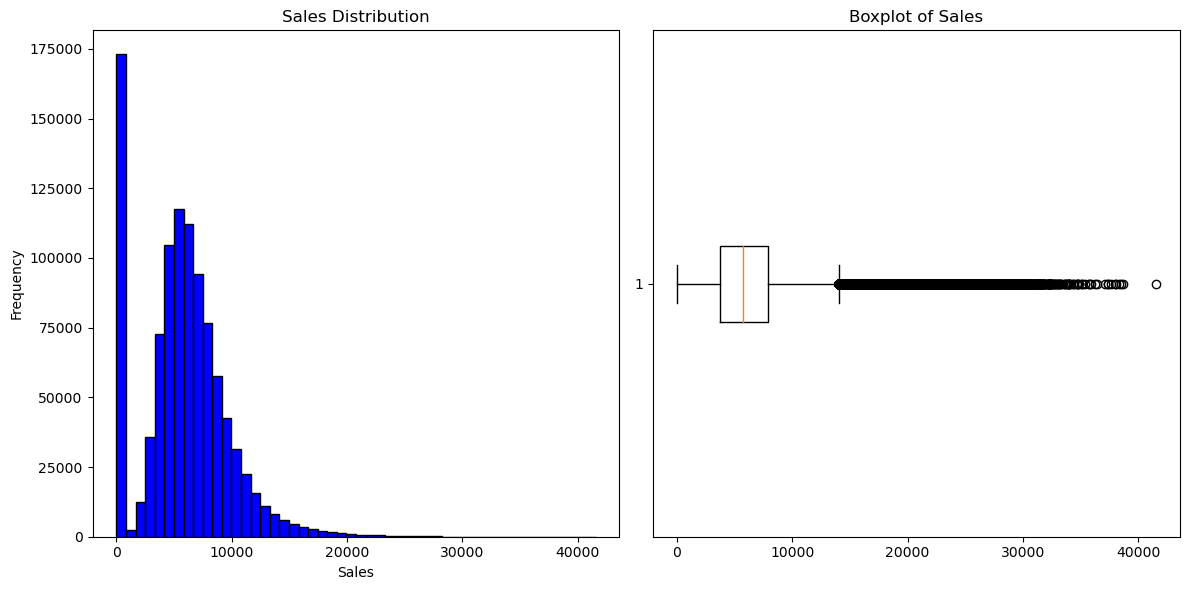

Number of rows before removing outliers: 1017209
Number of rows after removing outliers: 990515


In [8]:
import matplotlib.pyplot as plt

# Step 1: Visualize the Sales Data
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(train_df['Sales'], bins=50, color='blue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(train_df['Sales'], vert=False)
plt.title('Boxplot of Sales')

plt.tight_layout()
plt.show()

# Step 2: Identify Outliers using IQR method
Q1 = train_df['Sales'].quantile(0.25)
Q3 = train_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove Outliers
train_df_cleaned = train_df[(train_df['Sales'] >= lower_bound) & (train_df['Sales'] <= upper_bound)]

# Print the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(train_df)}")
print(f"Number of rows after removing outliers: {len(train_df_cleaned)}")


**Merging Data**
- Merge train_df with store_df: We'll merge these datasets on the Store column, which is common to both datasets.
- Merge test_df with store_df: Similarly, we'll also merge the test dataset with the store information.


In [9]:
# Merge train_df with store_df
train_df_merged = pd.merge(train_df_cleaned, store_df, on='Store', how='left')

# Merge test_df with store_df
test_df_merged = pd.merge(test_df, store_df, on='Store', how='left')

# Display the first few rows of the merged dataframes to confirm the merge
print("Merged train_df:")
print(train_df_merged.head())

print("\nMerged test_df:")
print(test_df_merged.head())


Merged train_df:
  Store DayOfWeek       Date  Sales  Customers  Open Promo StateHoliday  \
0     1         5 2015-07-31   5263        555     1     1            0   
1     2         5 2015-07-31   6064        625     1     1            0   
2     3         5 2015-07-31   8314        821     1     1            0   
3     4         5 2015-07-31  13995       1498     1     1            0   
4     5         5 2015-07-31   4822        559     1     1            0   

  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             1         c          a               1270.0   
1             1         a          a                570.0   
2             1         a          a              14130.0   
3             1         c          c                620.0   
4             1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0     

-------------------------------------------------------------------------------------------------------------------

### **3.Exploratory Data Analysis(EDA)**

**3.1 Univariate Analysis**
- We will examine the distribution of key variables, such as Sales, Customers, StoreType, and CompetitionDistance.

First i'll start by analyzing the distribution of key variables using histograms, box plots, and density plots.

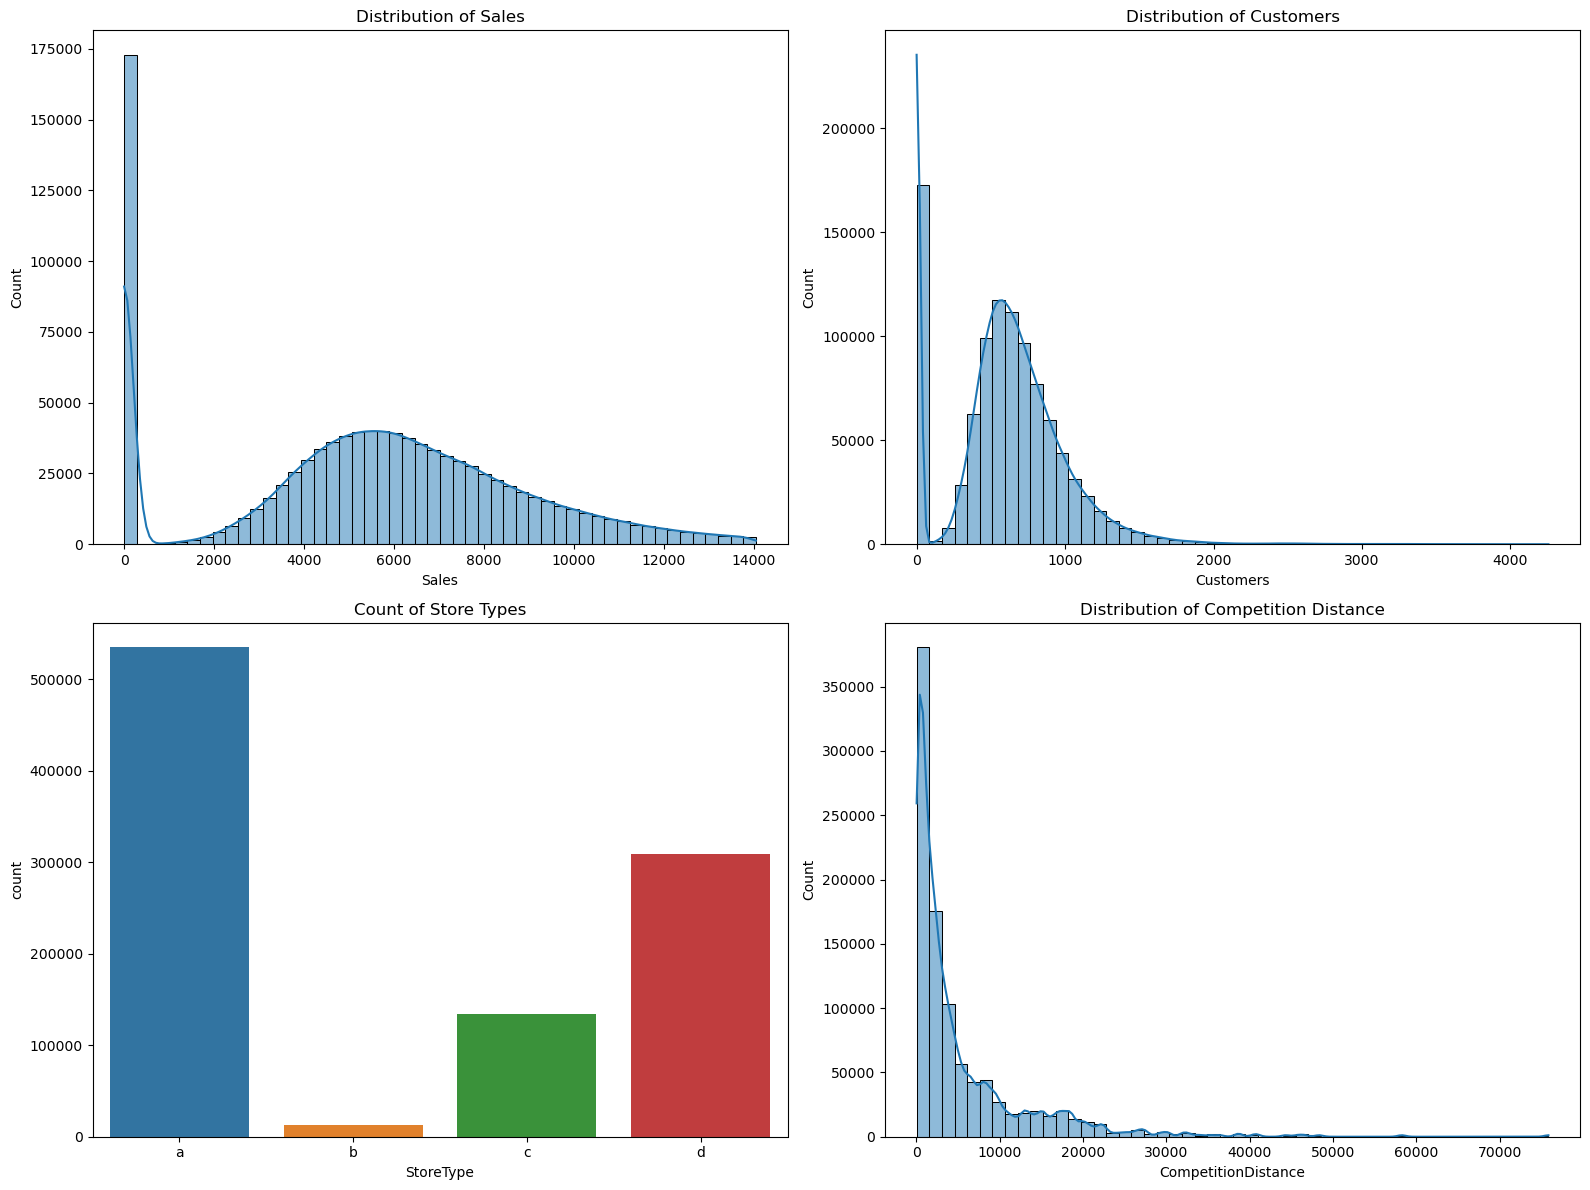

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axis for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales distribution
sns.histplot(train_df_merged['Sales'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Sales')

# Customers distribution
sns.histplot(train_df_merged['Customers'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Customers')

# StoreType distribution
sns.countplot(x='StoreType', data=train_df_merged, ax=axes[1, 0])
axes[1, 0].set_title('Count of Store Types')

# CompetitionDistance distribution
sns.histplot(train_df_merged['CompetitionDistance'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Competition Distance')

plt.tight_layout()
plt.show()


**Analysis**

**Sales Distribution**
- Histogram with KDE: The sales distribution is typically right-skewed. This means that most stores have lower sales, with a smaller number of -stores having very high sales.
- insight: The skewness suggests that while some stores are very successful, many stores may struggle with lower sales. This could indicate variability in store performance due to factors like location, competition, or store type.

**Customers Distribution**
- Histogram with KDE: Similar to the sales distribution, the number of customers is also right-skewed. This indicates that most stores see a moderate number of customers, while a few stores attract a much larger crowd.
- Insights: Higher customer traffic often correlates with higher sales, but the variation suggests that not all customer visits convert into sales equally across stores.

**StoreType Distribution**
- Count Plot: The distribution of store types shows which types are most common. For example, if type 'a' is the most frequent, it may represent the typical Rossmann store, whereas other types may cater to different markets or offer different services.
-Insights: Understanding which store types dominate can help focus efforts on analyzing those that contribute most to overall sales.

**CompetitionDistance Distribution**
- Histogram with KDE: The distribution of CompetitionDistance may show a concentration around certain values, with some stores having very close competition and others being more isolated.
- Insights: Stores with nearby competition might have to work harder (e.g., through promotions) to maintain sales. Isolated stores might have a competitive advantage in 

-------------------------------------------------------------------------------------------------------------------


**3.2 Bivariate and Multivariate Analysis**
- We will explore relationships between variables, such as the impact of promotions on sales, the effect of competition distance, and seasonal variations.



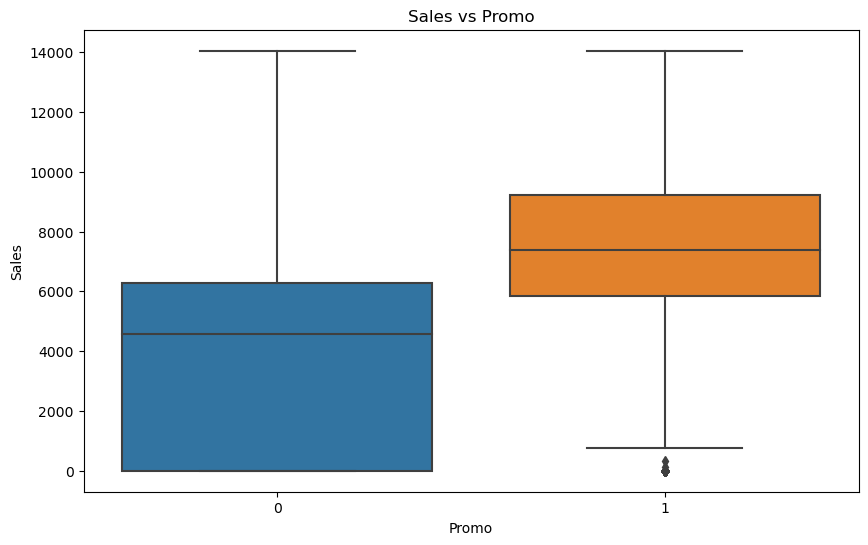

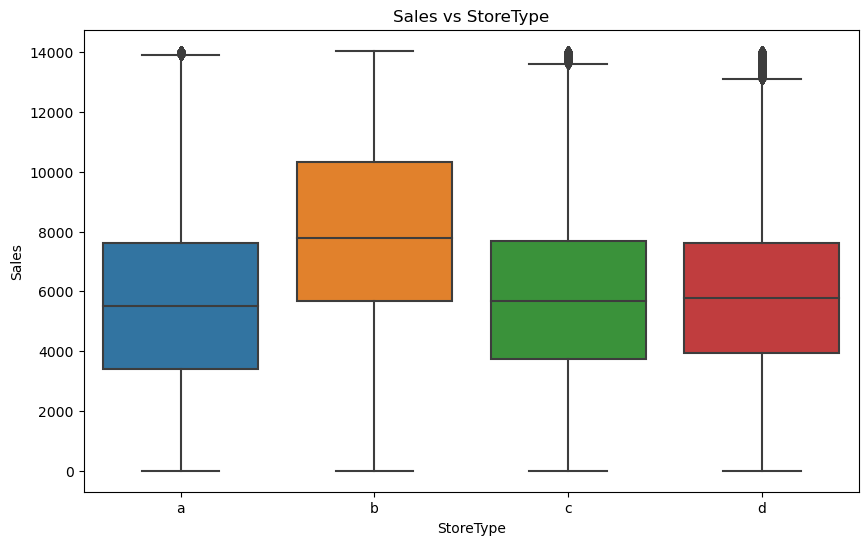

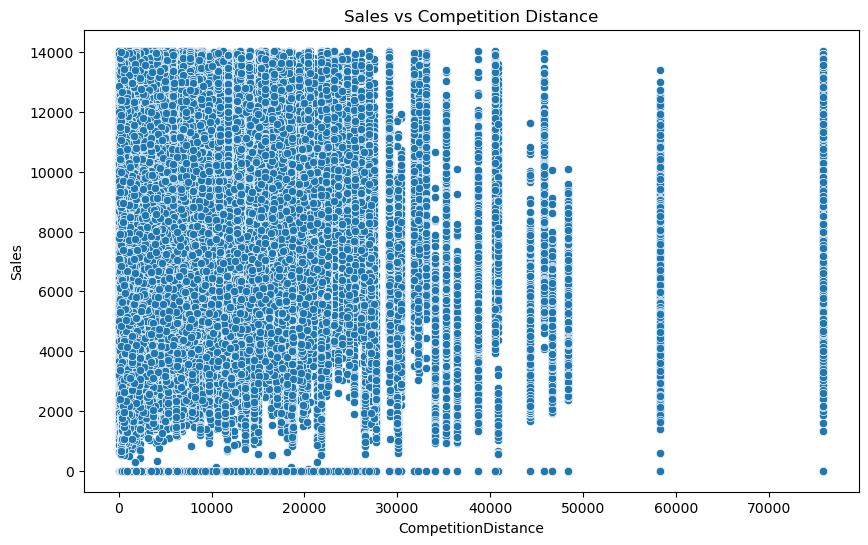

In [11]:
# Sales vs Promo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_df_merged)
plt.title('Sales vs Promo')
plt.show()

# Sales vs StoreType
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_df_merged)
plt.title('Sales vs StoreType')
plt.show()

# Sales vs CompetitionDistance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_df_merged)
plt.title('Sales vs Competition Distance')
plt.show()


**Analysis**

**Sales vs Promo**
- Box Plot: This plot typically shows that stores running promotions (Promo = 1) have higher median sales than those without promotions (Promo = 0). The spread (variance) in sales might also be larger for promoted sales.
- Insights: Promotions are an effective way to boost sales, though the impact can vary significantly across stores. Some stores may benefit more from promotions than others.

**Sales vs StoreType**
- Box Plot: Different store types show varying levels of sales. For instance, some store types may consistently outperform others, while certain types may have wider variability in sales.
- Insights: Store type plays a significant role in sales performance. This might be due to differences in store size, location, customer demographics, or product offerings.

**Sales vs Competition Distance**
- Scatter Plot: The relationship between CompetitionDistance and Sales may reveal that closer competition (shorter distance) generally correlates with lower sales, while stores with less nearby competition tend to have higher sales.
- Insights: Competition impacts sales, but the effect is complex. Some stores manage to thrive even with close competition, possibly due to stronger brand loyalty or superior service.

**3.3 Time-Series Analysis**
- We will analyze sales trends over time, looking at seasonal patterns, holidays, and promotions.
- SAles Over Time 
- Sales By Day Of The Week
- Sales by Month 

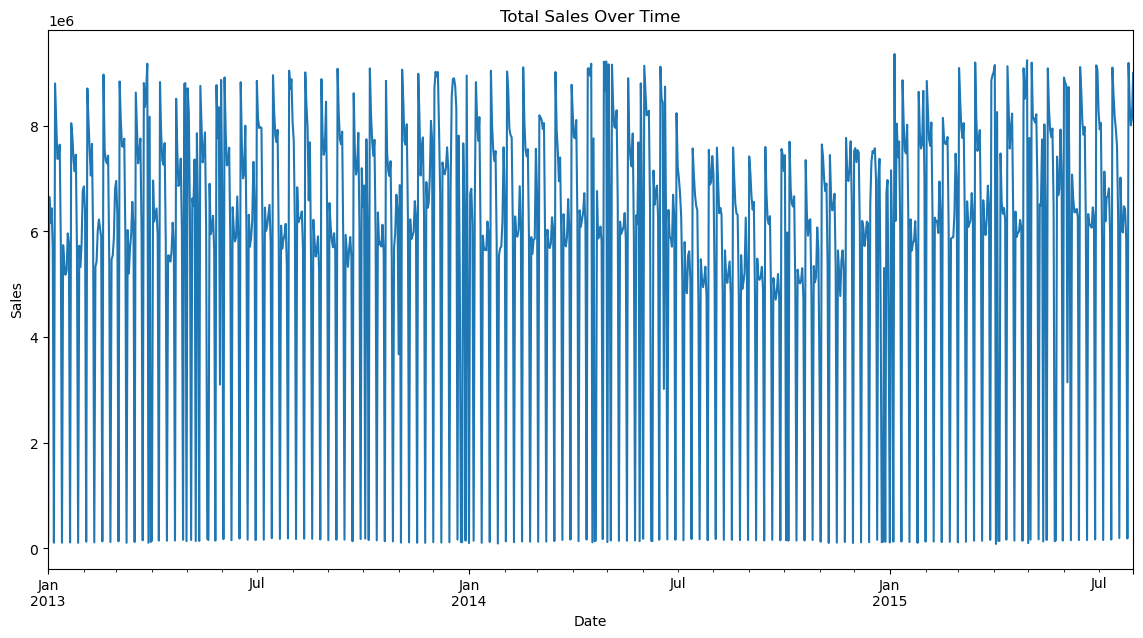

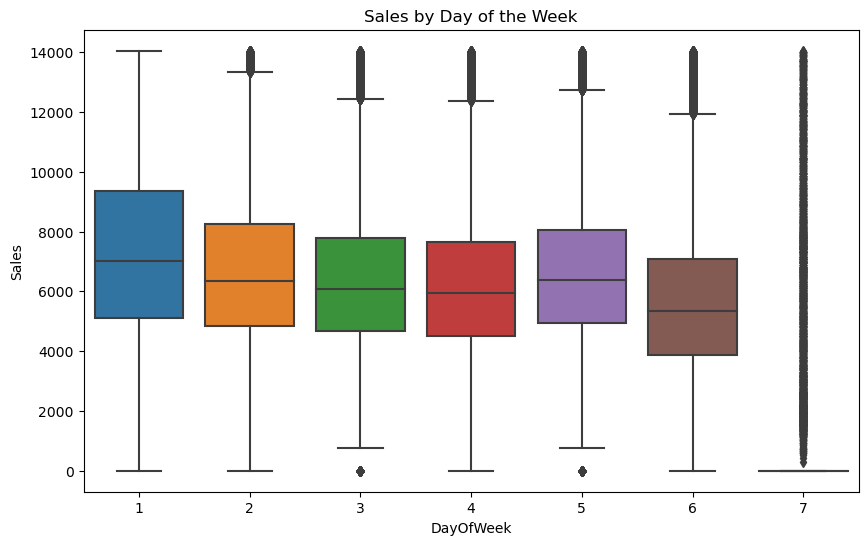

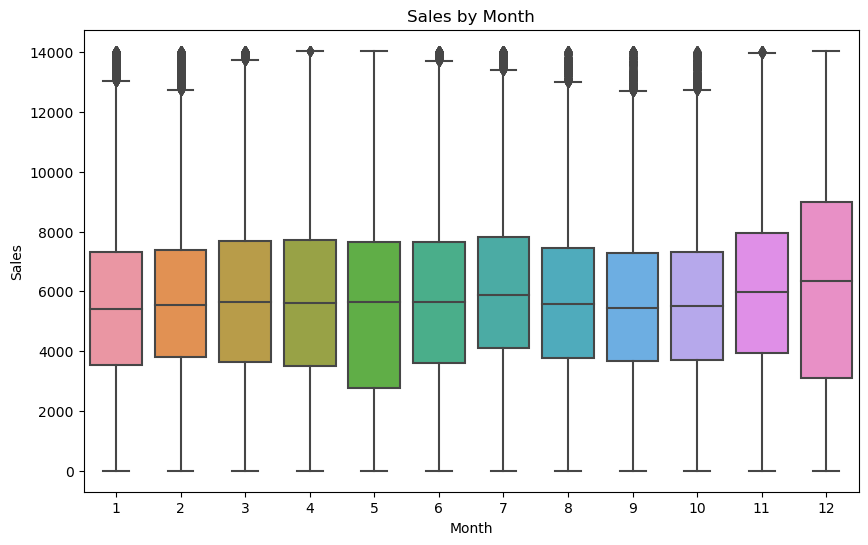

In [12]:
# Sales over time
plt.figure(figsize=(14, 7))
train_df_merged.groupby('Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Sales by DayOfWeek
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=train_df_merged)
plt.title('Sales by Day of the Week')
plt.show()

# Sales by Month
train_df_merged['Month'] = train_df_merged['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales', data=train_df_merged)
plt.title('Sales by Month')
plt.show()


**Analysis**

**Total Sales Over Time**
- Line Plot: The overall trend in sales over time may show seasonal patterns, such as peaks during certain times of the year (e.g., holidays or back-to-school periods) and troughs during slower periods.
- Insights: Sales are cyclical, with identifiable high and low periods. Understanding these trends is crucial for planning promotions and inventory management.

**Sales by Day of the Week**
- Box Plot: Sales typically vary by the day of the week, with some days (e.g., weekends) showing higher median sales than others (e.g., weekdays).
- Insights: Certain days are consistently more profitable, which could inform staffing and promotional strategies. For example, running promotions on slower days might help balance the sales across the week.

**Sales by Month**
- Box Plot: Monthly sales trends often reveal seasonality, with some months consistently outperforming others. For example, November and December might show spikes due to holiday shopping.
- Insights: Seasonal variations are crucial for forecasting and planning. Identifying peak months allows for better resource allocation, such as increasing stock levels or running targeted marketing campaigns.

**EDA Summary Of Key Findings**
- **Sales and Customer Distribution:** Both are right-skewed, indicating variability in store performance.
- **Promotions:** Effective in boosting sales, though impact varies across stores.
- **Store Types:** Different types perform differently, suggesting the need for tailored strategies based on store type.
- **Competition:** Closer competition generally leads to lower sales, but the relationship is not absolute.
- **Time-Series Trends:** Sales show clear seasonal patterns, with specific days and months being more profitable.

**3.4 Correlation Analysis**

- **Correlation Analysis:** A heatmap can reveal how strongly different features are correlated with each other and with the target variable (Sales). Strong correlations can indicate multicollinearity, which might need to be addressed.
- **Feature Selection:** Identifying features that have a strong correlation with the target variable (Sales) can guide you in selecting the most relevant features for your predictive models.

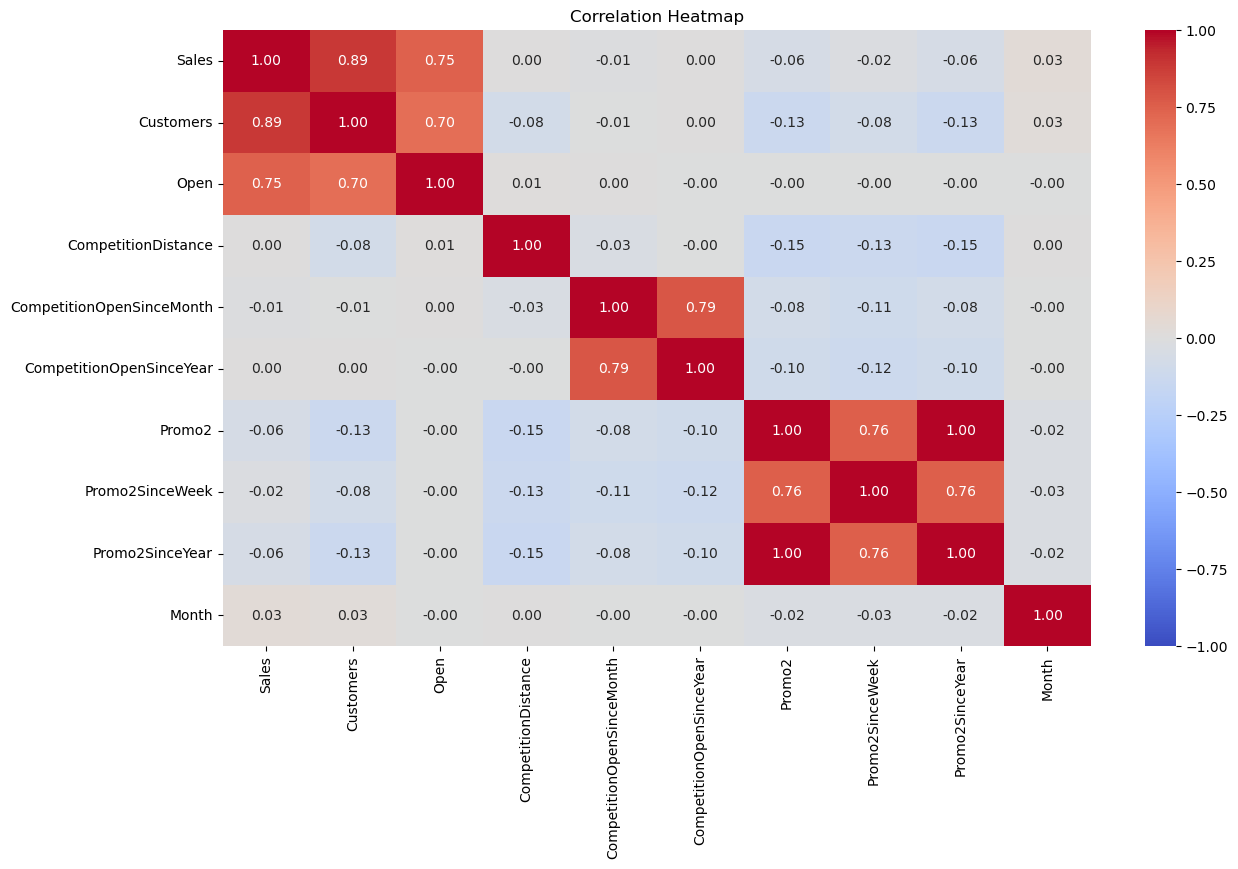

Sales                        1.000000
Customers                    0.886841
Open                         0.745994
Month                        0.034278
CompetitionDistance          0.003234
CompetitionOpenSinceYear     0.000636
CompetitionOpenSinceMonth   -0.008401
Promo2SinceWeek             -0.023359
Promo2                      -0.061149
Promo2SinceYear             -0.061163
Name: Sales, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_columns = train_df_merged.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numerical features
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Display the correlation matrix to identify strong correlations
corr_sales = corr_matrix['Sales'].sort_values(ascending=False)
print(corr_sales)



**Analysis Of The HeatMap**

**Strong Positive Correlations**

- Sales and Customers (0.88): There is a very strong positive correlation between Sales and Customers. This means that the number of customers is a crucial predictor of sales.
- Action: Ensure that Customers is included as a key feature in your models.


**Moderate Positive Correlation**

- Sales and Open (0.75): The Open variable is also positively correlated with Sales. This makes sense since stores that are open will have sales, whereas closed stores will not.
- Action: Include Open in the model, but be cautious as it might be binary and less informative on days when all stores are open or closed.

**Low or No Correlatio**

- CompetitionDistance, Promo2, Promo2SinceWeek, and Promo2SinceYear: These features show low or almost no correlation with Sales.
- Action: These features may not be strong predictors individually but could still play a role in interactions or more complex models like tree-based models or neural networks.

**Multicollinearity**

- Promo2, Promo2SinceWeek, Promo2SinceYear: These features are highly correlated with each other, indicating multicollinearity.
- Action: You might consider using only one of these features or using dimensionality reduction techniques like PCA to address multicollinearity. Alternatively, tree-based models like Random Forest or XGBoost can handle multicollinearity better than linear models.

------------------------------------------------------------------------------------------------------

### **4. Feature Engineering**
This step involves creating new features that may help improve model performance, encoding categorical variables, and selecting the most relevant features for model building.




**Create New Features**

 - Extract Date-Related Features
 - Create Binary Features
 - Engineer Features for Competition and Promotions
 - Create an "IsPromo" Feature indicating if promotion is running 
 - Enginer Features For Competition and Promotion (in months and in weeks)
 - Add Lag Features
 - Add Sine and Cosine Transformation 
 - Split the Dataset Based on Time

In [14]:
# Extract date-related features
train_df_merged['DayOfWeek'] = train_df_merged['Date'].dt.dayofweek
train_df_merged['Month'] = train_df_merged['Date'].dt.month
train_df_merged['Year'] = train_df_merged['Date'].dt.year
train_df_merged['WeekOfYear'] = train_df_merged['Date'].dt.isocalendar().week

test_df_merged['DayOfWeek'] = test_df_merged['Date'].dt.dayofweek
test_df_merged['Month'] = test_df_merged['Date'].dt.month
test_df_merged['Year'] = test_df_merged['Date'].dt.year
test_df_merged['WeekOfYear'] = test_df_merged['Date'].dt.isocalendar().week

# Create binary features
train_df_merged['IsHoliday'] = train_df_merged['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
test_df_merged['IsHoliday'] = test_df_merged['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Create an "IsPromo" feature indicating if a promotion is running
train_df_merged['IsPromo'] = train_df_merged['Promo'].apply(lambda x: 1 if x == 1 else 0)
test_df_merged['IsPromo'] = test_df_merged['Promo'].apply(lambda x: 1 if x == 1 else 0)

# Engineer features for competition and promotions
# Competition duration in months
train_df_merged['CompetitionOpenSince'] = 12 * (train_df_merged['Year'] - train_df_merged['CompetitionOpenSinceYear']) + (train_df_merged['Month'] - train_df_merged['CompetitionOpenSinceMonth'])
test_df_merged['CompetitionOpenSince'] = 12 * (test_df_merged['Year'] - test_df_merged['CompetitionOpenSinceYear']) + (test_df_merged['Month'] - test_df_merged['CompetitionOpenSinceMonth'])

# Promo2 duration in weeks
train_df_merged['Promo2OpenSince'] = 52 * (train_df_merged['Year'] - train_df_merged['Promo2SinceYear']) + (train_df_merged['WeekOfYear'] - train_df_merged['Promo2SinceWeek'])
test_df_merged['Promo2OpenSince'] = 52 * (test_df_merged['Year'] - test_df_merged['Promo2SinceYear']) + (test_df_merged['WeekOfYear'] - test_df_merged['Promo2SinceWeek'])


 **Encode Categorical Variables**
 
 We'll encode categorical variables using either one-hot encoding or label encoding, depending on the nature of the variable.

In [15]:
# Encode categorical variables using one-hot encoding or label encoding in both Train and Test dataframes 
train_df_encoded = pd.get_dummies(train_df_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
test_df_encoded = pd.get_dummies(test_df_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)


 **Add Lag Features For Sales**

In [16]:

train_df_merged['Sales_Lag_1'] = train_df_merged['Sales'].shift(1)
train_df_merged['Sales_Lag_7'] = train_df_merged['Sales'].shift(7)
train_df_merged['Sales_Lag_30'] = train_df_merged['Sales'].shift(30)

 **Add Sine and Cosine Transformation**

In [17]:
import numpy as np

# Step 2: Add Sine and Cosine Transformations
# Apply Sine and Cosine Transformations to cyclical features
train_df_merged['DayOfWeek_Sin'] = np.sin(2 * np.pi * train_df_merged['DayOfWeek'] / 7)
train_df_merged['DayOfWeek_Cos'] = np.cos(2 * np.pi * train_df_merged['DayOfWeek'] / 7)

train_df_merged['Month_Sin'] = np.sin(2 * np.pi * train_df_merged['Month'] / 12)
train_df_merged['Month_Cos'] = np.cos(2 * np.pi * train_df_merged['Month'] / 12)

train_df_merged['WeekOfYear_Sin'] = np.sin(2 * np.pi * train_df_merged['WeekOfYear'] / 52)
train_df_merged['WeekOfYear_Cos'] = np.cos(2 * np.pi * train_df_merged['WeekOfYear'] / 52)



**Drop Any NA Values resulting from Lagging and Sin and Cosine**

In [18]:
train_df_merged = train_df_merged.dropna()

**Split The Data into Training and Based on time**

In [19]:
cutoff_date = '2015-06-01'  # Example date, adjust based on your dataset
train_set = train_df_merged[train_df_merged['Date'] < cutoff_date]
test_set = train_df_merged[train_df_merged['Date'] >= cutoff_date]


**Feature Selection**

- We'll use the correlation analysis and feature importance (from models like Random Forest) to select the most relevant features.
- Drop drop columns that won't be used in modeling (e.g., Date, StateHoliday)
- Fit a RandomForest model to estimate feature importance.
- plot feature importance


                Feature  Importance
0                  Open    0.558978
2                 Store    0.119872
1   CompetitionDistance    0.119171
4                 Promo    0.036397
11          Sales_Lag_1    0.034069
3               IsPromo    0.033589
12          Sales_Lag_7    0.026264
13         Sales_Lag_30    0.023945
6         DayOfWeek_Cos    0.014326
8             Month_Cos    0.008762


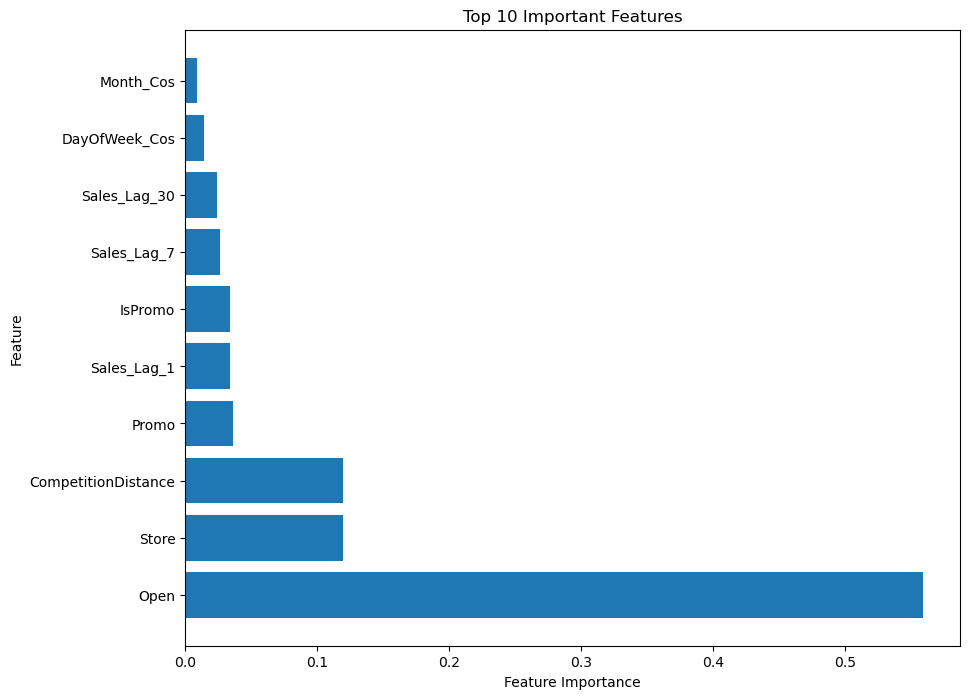

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Define the feature set, including the new lag and sine/cosine features
feature_selection = [
    'Open', 'CompetitionDistance', 'Store', 'IsPromo', 'Promo',
    'DayOfWeek_Sin', 'DayOfWeek_Cos', 'Month_Sin', 'Month_Cos',
    'WeekOfYear_Sin', 'WeekOfYear_Cos', 'Sales_Lag_1', 'Sales_Lag_7', 'Sales_Lag_30']

X_train = train_set[feature_selection]
y_train = train_set['Sales']

#Fit the Random Forest model using the selected features to determine their importance.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X_train.columns

#Review and visualize the top features to determine which are most influential in predicting sales.
# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importance_df.head(10))

# Optionally, plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10))
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features")
plt.show()

**Analysis of Feature Importanc**


**High Importance Features**

- pen (0.558978): This feature is by far the most important, which makes sense because sales cannot occur if the store is closed.
- Store (0.119872) and CompetitionDistance (0.119171): These are also highly important, likely capturing location-specific effects and the impact of competition on sales.
- Promo (0.036397) and IsPromo (0.033589): These features indicate the presence of promotions, which can significantly influence sales.

**Lag Feature**
- Sales_Lag_1 (0.034069): This shows the immediate effect of the previous day's sales on today's sales, which is quite important.
- Sales_Lag_7 (0.026264) and Sales_Lag_30 (0.023945): These features capture weekly and monthly trends, though they are slightly less important than the 1-day lag.

**Sine/Cosine Transformations**
- DayOfWeek_Cos (0.014326) and Month_Cos (0.008762): These features are less important, indicating that the cyclical patterns they capture are not as strong compared to other features.

------------------------------------------------------------------------------------------------------------------------------

**Selected Features**

In [21]:
selected_features = [
    'Open', 
    'Store', 
    'CompetitionDistance', 
    'Promo', 
    'IsPromo', 
    'Sales_Lag_1', 
    'Sales_Lag_7', 
    'DayOfWeek_Cos'
]
# Define features and target using the selected features from feature importance
X_train = train_set[selected_features]
y_train = train_set['Sales']

X_test = test_set[selected_features]
y_test = test_set['Sales']

### **5.Model Building**

- baseline model using the top features identified.
- Experiment with different models like Linear Regression, Random Forest, XGBoost, or more advanced techniques based on your project's requirements.
- Evaluate model performance using cross-validation and metrics like RMSE, MAE, or R².


**Baseline Model: Linear REgression**

We'll begin by building a simple baseline model using Linear Regression. This will give us a benchmark against which we can compare more complex models.


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_mae = mean_absolute_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression Model - RMSE: {linear_rmse:.4f}, MAE: {linear_mae:.4f}, R²: {linear_r2:.4f}")



Linear Regression Model - RMSE: 2027.8679, MAE: 1501.9672, R²: 0.6231


**Random Forest Model**

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model - RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")



**XGBoost Model** 

Enable the Categorical Handling in XGbBoost

In [ ]:
print(X_train.dtypes)


Open                      int64
Store                  category
CompetitionDistance     float64
Promo                  category
IsPromo                category
Sales_Lag_1             float64
Sales_Lag_7             float64
DayOfWeek_Cos           float64
dtype: object


In [ ]:
from xgboost import XGBRegressor

from xgboost import XGBRegressor

# Initialize and fit the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model - RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R²: {xgb_r2:.4f}")





ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Store: category, Promo: category, IsPromo: category

**LighGBM Regressor Model**

Make sure that all data types are numerical 

In [ ]:
# Convert the 'Promo2OpenSince' and 'WeekOfYear' columns to numeric types (if they are not already)
X_train['Promo2OpenSince'] = X_train['Promo2OpenSince'].astype(float)
X_train['WeekOfYear'] = X_train['WeekOfYear'].astype(int)

X_val['Promo2OpenSince'] = X_val['Promo2OpenSince'].astype(float)
X_val['WeekOfYear'] = X_val['WeekOfYear'].astype(int)

# Initialize and fit the LightGBM model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lgbm = lgbm_model.predict(X_val)

# Evaluate the model
lgbm_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lgbm))
lgbm_mae = mean_absolute_error(y_val, y_pred_lgbm)
lgbm_r2 = r2_score(y_val, y_pred_lgbm)

print(f"LightGBM Model - RMSE: {lgbm_rmse:.4f}, MAE: {lgbm_mae:.4f}, R²: {lgbm_r2:.4f}")



LightGBM Model - RMSE: 850.4660, MAE: 561.4828, R²: 0.9362


### **6.Hyperparameter Tuning**

- Once you've identified promising models, use techniques like Grid Search or Random Search to fine-tune their hyperparameters for better performance.

### **7.Final Model Selection**
- After tuning, select the best-performing model based on evaluation metrics and consider ensembling multiple models if necessary.

### **8.Predictions and Analysis**
- Use the final model to predict sales on the test dataset.
Analyze prediction errors to identify any patterns or areas for further improvement.